In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statistics import mean
import pandas.io.formats.format as pf
from pandas.plotting import parallel_coordinates
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment

In [98]:
data=pd.read_excel("C:/Users/shafi/Downloads/iris (4).xls")

In [99]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [102]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [103]:
data.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# 2. Do necessary pre-processing steps.


In [104]:
#to find missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [105]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [106]:
for i in ['SL','SW','PL']:
      data[i]=data[i].fillna(data[i].median())

In [107]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

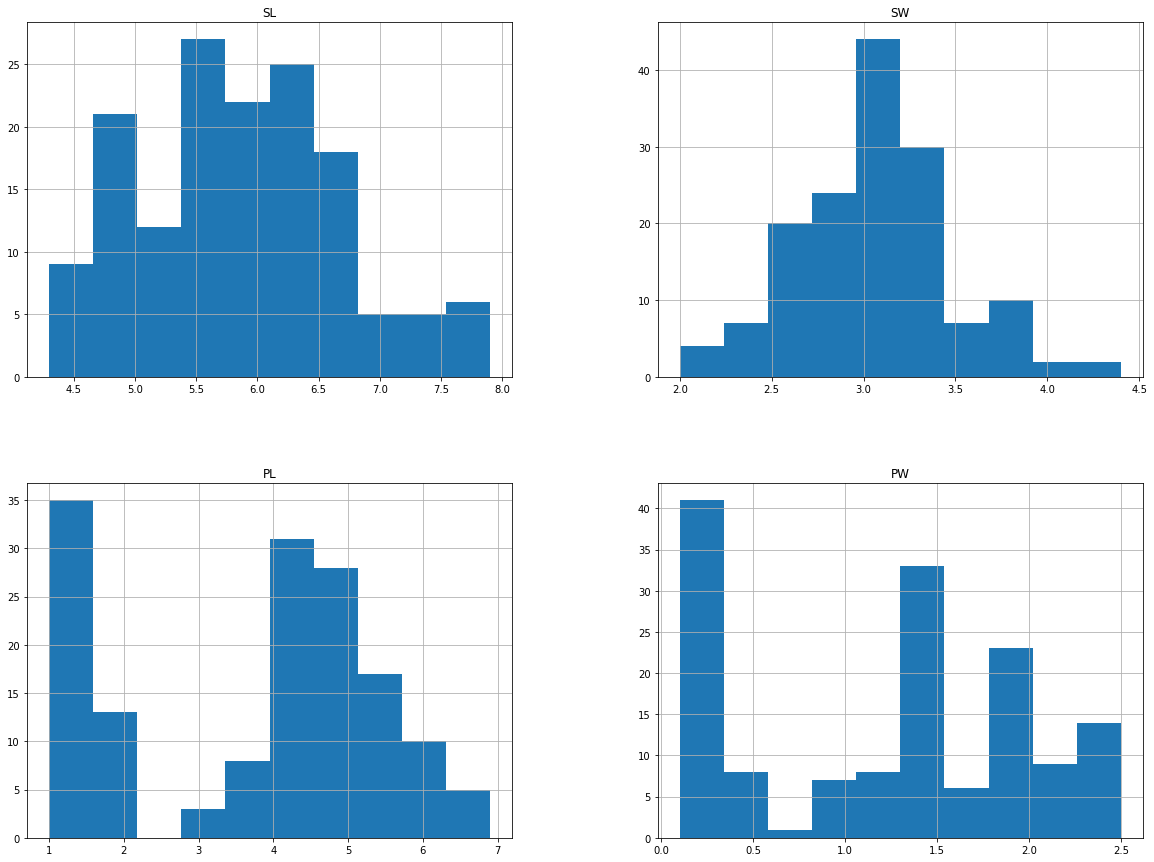

In [108]:
#visualize using histogram
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

 For both petal_length and petal_width, there seems to be a group of data points that have smaller values than the others, suggesting that there might be different groups in this data.

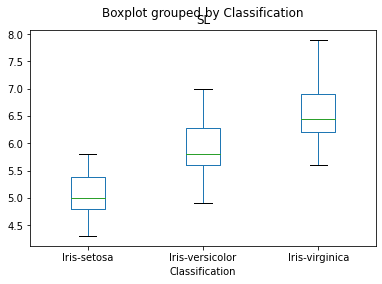

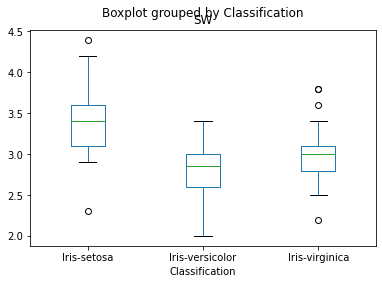

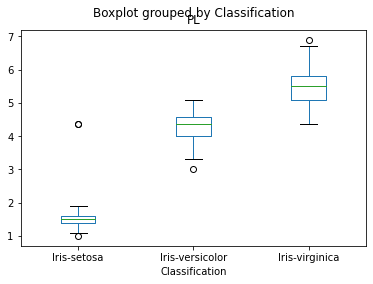

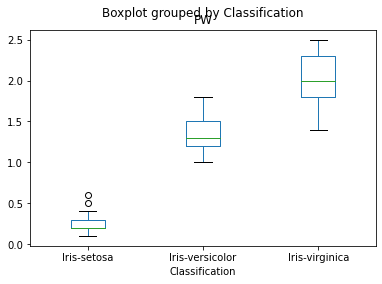

In [109]:
#visualize using box plot
data.boxplot(by ='Classification', column =['SL'], grid = False);
data.boxplot(by ='Classification', column =['SW'], grid = False);
data.boxplot(by ='Classification', column =['PL'], grid = False);
data.boxplot(by ='Classification', column =['PW'], grid = False);

iris_Setosa has the smallest features and less distributed with some outliers.
iris_Versicolor has the average features.
iris_Virginica has the highest features

<AxesSubplot:xlabel='SW'>

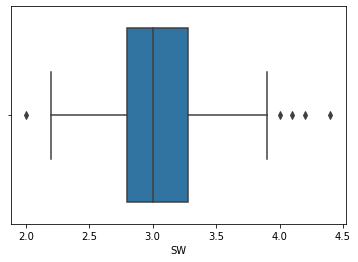

In [110]:
#handling outliers
sns.boxplot(x='SW', data=data)

Old Shape:  (150, 5)
New Shape:  (145, 5)


<AxesSubplot:xlabel='SW'>

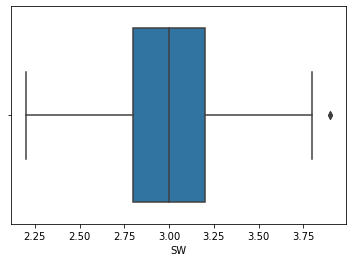

In [111]:
# IQR
Q1 = np.percentile(data['SW'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(data['SW'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", data.shape)
  
# Upper bound
upper = np.where(data['SW'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(data['SW'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
  
print("New Shape: ", data.shape)
  
sns.boxplot(x='SW', data=data)

In [112]:
# label encoding
from sklearn import preprocessing
 

label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Classification'.
data['Classification']= label_encoder.fit_transform(data['Classification'])
 
data['Classification'].unique()

array([0, 1, 2])

In [113]:
#split the data
y=data['Classification']
X=data.drop('Classification',axis=1)

In [114]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 101 samples in the training set and 44 samples in the test set


In [115]:
#Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)



# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


# kNN

In [116]:
# K-Nearest Neighbors

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.918918918918919


In [117]:
# Another way of evaluating the perfomance of our model is using 
# KFold: This approach is better that train/test split
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores.mean())

0.9514285714285714


In [118]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9519047619047619, 0.9447619047619048, 0.9514285714285714, 0.9580952380952381, 0.9514285714285714, 0.950952380952381, 0.9514285714285714, 0.9438095238095239, 0.9438095238095239, 0.9438095238095239, 0.9438095238095239, 0.9438095238095239, 0.950952380952381, 0.9438095238095239, 0.950952380952381, 0.9504761904761905, 0.950952380952381, 0.9576190476190476, 0.950952380952381, 0.9576190476190476, 0.9442857142857143, 0.9576190476190476, 0.950952380952381, 0.9576190476190476, 0.9442857142857143, 0.93, 0.9442857142857143, 0.9304761904761906, 0.9304761904761906, 0.93]


Text(0, 0.5, 'Cross-Validated Accuracy')

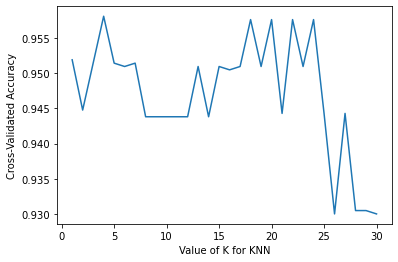

In [119]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [120]:
# 10-fold cross-validation with the best KNN model
# This will allow us to get a better results
knn = KNeighborsClassifier(n_neighbors=20)

print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9576190476190476


95.7% accuracy

# Logistic Regression

In [121]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size = 0.3, random_state=101)

In [122]:
sv=LogisticRegression()
sv.fit(X_train,Y_train)
sv.predict(X_test)

array([1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2,
       2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0])

In [123]:
sv.score(X_test,Y_test)

0.9545454545454546

In [124]:
test_score=sv.score(X_test,Y_test)
test_score

0.9545454545454546

95.4% accuracy

KNN MODEL IS BEST WITH A BIT HIGH ACCURACY